# Assignment 10

### 2. 回答一下理论题目

#### 1. What is independent assumption in Naive bayes ?
利用贝叶斯定理求解联合概率P(XY)时，需要计算条件概率P(X|Y)。在计算P(X|Y)时，朴素贝叶斯做了一个很强的条件独立假设（当Y确定时，X的各个分量取值之间相互独立），即P(X1=x1,X2=x2,...Xj=xj|Y=yk) = P(X1=x1|Y=yk)*P(X2=x2|Y=yk)*...*P(Xj=xj|Y=yk)。

#### 2. What is MAP(maximum a posterior) and ML(maximum likelihood) ?
<img src="http://users.du.se/~h19jiali/NLP_materials/MLandMAP.png" width="60%">

#### 3. What is support vector in SVM?
明确超平面就是由支持向量确定的，其他点不影响，甚至来说去掉都可以

对于线性可分支持向量,定义是：
1. 距离超平面最近的点称为支持向量
2. 在求解对偶问题中对应alpha大于0的样本为支持向量
（利用这些大于0的alpha可以求解w*,b*）

#### 4. What is the intuition behind SVM ?
SVM利用直线（或高维空间中的超平面）对数据进行分类，使得离直线（或超平面）最近的所有点间隔之和最大化。

#### 5. Shortly describ what 'random' means in random forest ?
随机，是指每次利用Decision Tree对数据进行训练时，会从所有数据中随机放回地取样，并从所有特征中随机选取若干个特征，利用这些数据对特征进行划分。

如果不进行随机抽样，每棵树的训练集都一样，那么最终训练出的树分类结果也是完全一样的，这样该算法失去了作用。


#### 6. What cariterion does XGBoost use to find the best split point in a tree ?
XGBoost定义了目标函数，使得分割时，对每一个叶子节点，目标函数最小化。Obj=损失函数+惩罚项；

找到树中的最佳分割点的方式如下：
创建的第一个树中，比哪个叶子节点的损失函数更小，最佳分割点就是该点。Obj相当于DT中的交叉熵，Obj就是最佳分割点的评判指标。若损失函数都大于0，则说明回归树分到这里到此为止，不再分，可以建立下一棵树了。

目标函数的推导在此：https://github.com/jianengli/NLP-learning/blob/master/Lab11/XGBoost%20objective%20function%E6%8E%A8%E5%AF%BC.docx

### 3. Practial part

##### Problem description: In this part you are going to build a classifier to detect if a piece of news is published by the Xinhua news agency (新华社）.

#### Hints:

###### 1. Firstly, you have to come up with a way to represent the news. (Vectorize the sentence, you can find different ways to do so online)  

1. 导入新闻的csv文件，利用第二课学习的内容计算每个词的词频，存在word_frequency.txt

In [1]:
import pandas as pd
data = pd.read_csv('newsData.csv', encoding='gb18030').astype(str)
data.head(6)

,id,author,source,content,feature,title,url
0,89617,nan,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,nan,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,nan,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,nan,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...
5,89612,张怡,中国证券报?中证网,受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",金融股一枝独秀 配置价值犹存,http://www.cs.com.cn/gppd/201706/t20170623_533...


In [2]:
data['source']

0        快科技@http://www.kkj.cn/
1        快科技@http://www.kkj.cn/
2        快科技@http://www.kkj.cn/
3                           新华社
4                         深圳大件事
                  ...          
89606                       新华社
89607                       新华社
89608                       新华社
89609                       新华社
89610                       新华社
Name: source, Length: 89611, dtype: object

In [3]:
target =[]
for t in data['source'][:2000]:
    if '新华社' in str(t):
        target.append(1)
    else:
        target.append(0)

In [4]:
target.count(1)

61

2. 获取词向量

In [5]:
import numpy as np
word_vector = np.load('words_vector.npy',allow_pickle= True)
word_vector[1][1]

array([ 2.9128826 ,  2.4138129 , -0.6820831 , -2.2370648 ,  0.8215479 ,
       -0.88271725, -2.0981119 , -1.1033323 ,  1.537945  , -0.3546451 ,
        0.7808675 , -0.7843561 , -0.72557986, -0.22322863,  0.35288247,
       -0.65319717,  1.1811767 , -0.7211819 ,  1.3457123 ,  0.75022477,
       -1.8052047 , -0.4551917 , -1.4725337 ,  1.1159366 ,  0.5389294 ,
       -0.9617048 , -1.6751138 , -3.1507447 ,  0.51716864,  0.08306495,
        0.27339116,  1.1788452 ,  0.38518637,  2.270497  ,  2.561843  ,
        4.4973726 ,  1.0004891 ,  0.9656983 , -0.83108914,  1.8887535 ,
        1.134195  , -1.0973676 ,  2.9050558 , -0.74143344, -1.9672239 ,
        2.714771  , -1.0209856 , -1.8207995 ,  1.2611095 ,  1.617234  ,
        0.07280897,  0.5227942 , -0.33035967,  1.3974648 , -0.7190129 ,
        0.43893245, -0.10529663, -1.6455683 , -1.29319   ,  1.373339  ,
        0.8510854 ,  1.2691967 , -0.43920514, -2.1155732 ,  0.9644124 ,
        1.3715022 ,  2.843844  , -1.412323  , -0.99518377,  0.11

In [6]:
word_dict = {}
for i in range(len(word_vector)):
    word_dict[word_vector[i][0]]=word_vector[i][1]
word_dict

{'的': array([ 7.92723179e-01,  4.66139495e-01, -2.91879445e-01,  1.13776987e-02,
        -6.96661055e-01,  1.52214491e+00, -3.21275622e-01, -2.01879978e-01,
        -5.43586373e-01,  1.37732983e+00,  1.40936530e+00,  2.12468171e+00,
        -2.54634887e-01,  2.35756725e-01, -6.78081512e-01, -8.04204941e-01,
        -1.26142061e+00,  3.71050477e-01,  1.37352931e+00,  2.42711559e-01,
        -5.19828796e-01,  6.08977079e-01, -4.76563483e-01, -2.80407190e-01,
        -1.59244275e+00,  1.25271291e-01, -6.84348524e-01,  8.42554033e-01,
        -2.00992942e+00,  7.19346225e-01,  9.03338015e-01, -6.14853144e-01,
         7.21458644e-02, -2.43449241e-01,  2.75977284e-01,  1.09666145e+00,
         1.82517886e-01, -7.71107823e-02,  2.40500838e-01, -1.04146874e+00,
         2.30004168e+00,  2.52492976e+00,  3.69752198e-01, -6.49952590e-01,
         9.59545672e-02, -4.65697646e-01,  1.54455662e+00, -7.61038391e-03,
        -7.37613738e-01, -1.64432034e-01, -9.95340765e-01,  1.46332705e+00,
       

In [7]:
word_frequency={}
for line in (open('word_frequency.txt', encoding='utf-8')):
    key = line.split()[0]
    value = line.split()[1]
    word_frequency[key] = value
word_frequency

{'此外': '0.00024071624804591874',
 '自': '0.00026478219691917256',
 '本周': '2.7414748362692466e-05',
 '6': '0.0016461336066559149',
 '月': '0.010746240802295165',
 '12': '0.0005429595917960996',
 '日起': '7.741970345075057e-05',
 '除': '7.145997554581742e-05',
 '小米': '1.623316362677028e-05',
 '手机': '0.00016988062494728478',
 '等': '0.0033012351848259198',
 '15': '0.0004682075760742239',
 '款': '3.450966253523192e-05',
 '机型': '7.889544559863877e-06',
 '外': '0.0001742510920775691',
 '其余': '2.7357989049312152e-05',
 '已': '0.0011852479820077518',
 '暂停': '4.728050804580295e-05',
 '更新': '3.5020496355654766e-05',
 '发布': '0.0004448794982749142',
 '含': '3.706383163734613e-05',
 '开发': '0.00022079372904942795',
 '版': '4.9607639894395895e-05',
 '体验版': '5.6759313380315665e-08',
 '内测': '3.40555880281894e-07',
 '稳定版': '5.6759313380315665e-08',
 '暂不受': '5.6759313380315665e-08',
 '影响': '0.00046116942121506477',
 '以': '0.0020925456063920975',
 '确保': '0.00016199108038742092',
 '工程师': '2.968512089790509e-05',
 '可以

In [8]:
articles = data['content'].tolist()

3. 向量化句子

In [9]:
import jieba
import re
def cut(text): return ' '.join(jieba.cut(text)) 
def SIF_sentence_embedding(text,alpha=1e-4):
    global word_frequency
    max_fre = max(word_frequency.values())
    sen_vec = np.zeros_like(word_dict['的'])
    words = cut(text).split()
    words = [w for w in words if w in word_dict]
    for w in words:
        fre = word_frequency.get(w,max_fre)
        weight = alpha/(float(fre)+alpha)
        sen_vec += weight*word_dict[w]
        
    sen_vec /= len(words)
    return sen_vec

In [10]:
def vectorize_sentence(text,embed_fn=SIF_sentence_embedding):
    if isinstance(text,list): text = ' '.join(text)  
    sub_sentences_clean = []
    sentence_vectors = {}
    sentence_vectors=embed_fn(text)

    return (sentence_vectors.tolist())
(vectorize_sentence(articles[20]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\38079\AppData\Local\Temp\jieba.cache
Loading model cost 1.836 seconds.
Prefix dict has been built successfully.


[0.06076742336153984,
 0.16471953690052032,
 0.041267722845077515,
 -0.1752922236919403,
 -0.048410654067993164,
 0.059353407472372055,
 -0.19330066442489624,
 0.05632258951663971,
 -0.2249619960784912,
 -0.1498403549194336,
 0.15191490948200226,
 0.10956832021474838,
 -0.3513775169849396,
 -0.017010528594255447,
 0.05281534790992737,
 0.07634256780147552,
 -0.30258476734161377,
 0.01768985204398632,
 0.0063755870796740055,
 -0.031494274735450745,
 -0.17928101122379303,
 0.2060432881116867,
 -0.0765574723482132,
 0.28010162711143494,
 -0.1786685287952423,
 -0.06536801159381866,
 -0.16869744658470154,
 -0.072380930185318,
 -0.19139689207077026,
 0.19311197102069855,
 -0.06092596426606178,
 -0.01324188057333231,
 -0.08970839530229568,
 -0.22986136376857758,
 0.11037671566009521,
 0.11426697671413422,
 -0.22788460552692413,
 -0.059698063880205154,
 -0.09282809495925903,
 0.07590129226446152,
 0.25085365772247314,
 0.21110640466213226,
 -0.10759664326906204,
 -0.053112950176000595,
 -0.163

In [11]:
target=np.array(target)

In [12]:
data_vectors=[]

for i in range(2000):      
    data_vectors.append(vectorize_sentence(articles[i]))
data_vectors=np.array(data_vectors)
data_vectors

<ipython-input-9-5785fd452bd7>:15: RuntimeWarning: invalid value encountered in true_divide
  sen_vec /= len(words)


array([[ 0.25918439,  0.09165151,  0.22063547, ...,  0.17184651,
         0.09246141,  0.12220551],
       [ 0.28456563, -0.12550384,  0.03718617, ...,  0.23209472,
         0.16307342,  0.01231866],
       [ 0.39333683, -0.05397264,  0.0633324 , ...,  0.21404259,
         0.11404064,  0.01630301],
       ...,
       [ 0.15041985,  0.25821212,  0.07194903, ..., -0.01876882,
         0.13599236,  0.02553929],
       [ 0.21399124,  0.1249781 ,  0.03824668, ...,  0.15801382,
         0.0852023 ,  0.22494616],
       [ 0.25180531,  0.20044984, -0.23258236, ..., -0.21895142,
         0.13237265,  0.27024961]])

4. 处理值为nan的向量

In [13]:
np.isnan(data_vectors).any()

True

In [14]:
data_vectors[np.isnan(data_vectors)] = 0

In [15]:
len(target) == len(data_vectors)

True

#### 2. Secondly, pick a machine learning algorithm that you think is suitable for this task

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,roc_curve

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data_vectors, target, test_size=0.2, random_state=0)
forest = RandomForestClassifier(n_estimators=500, max_depth=10)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
#评估模型准确率
forest.score(X_train, y_train)

0.99125

In [22]:
forest.score(X_test, y_test)

0.985

In [23]:
forest_y_pre=forest.predict(X_test)
forest_y_proba=forest.predict_proba(X_test)

forest_accuracy_score=accuracy_score(y_test,forest_y_pre)
forest_preci_score=precision_score(y_test,forest_y_pre)
forest_recall_score=recall_score(y_test,forest_y_pre)
forest_f1_score=f1_score(y_test,forest_y_pre)
forest_auc=roc_auc_score(y_test,forest_y_proba[:,1])
print('forest_accuracy_score: %f,forest_preci_score: %f,forest_recall_score: %f,forest_f1_score: %f,forest_auc: %f'
      %(forest_accuracy_score,forest_preci_score,forest_recall_score,forest_f1_score,forest_auc))


forest_accuracy_score: 0.985000,forest_preci_score: 1.000000,forest_recall_score: 0.538462,forest_f1_score: 0.700000,forest_auc: 0.904393


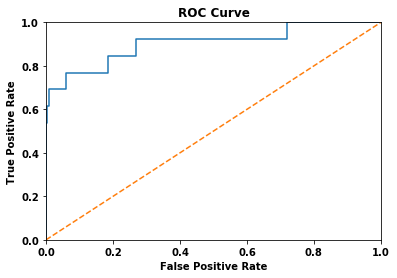

In [24]:
import matplotlib.pyplot as plt
forest_fpr,forest_tpr,forest_threasholds=roc_curve(y_test,forest_y_proba[:,1]) # 计算ROC的值,svm_threasholds为阈值
fig,ax = plt.subplots()
ax.plot(forest_fpr, forest_tpr)
ax.plot([0,1],[0,1], ls='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Option:

#### Try differnt machine learning algorithms with different combinations of parameters in the practical part, and compare their performances (Better use some visualization techiniques).

### 分别使用 DecisionTree, LogisticRegression,  SVM, Random Forest, GBDT, XGBoost 进行调参，比较模型的表现

In [25]:
import matplotlib.pyplot as plt # 可视化
import seaborn as sns # matplotlib的高级API
from sklearn.model_selection import StratifiedKFold #交叉验证
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_vectors, target, test_size=0.2, random_state=0)

1. DecisionTree模型调参与分析

In [27]:
# 用GridSearchCV寻找最优参数（字典）
param = {'criterion':['gini'],'max_depth':[30,100],'min_samples_leaf':[2,5,10],'min_impurity_decrease':[0.1,0.2,0.5]}
grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=10,n_jobs=-1, scoring='accuracy')
grid_result=grid_search.fit(X_train,y_train)#运行网格搜索
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
#grid_scores_：给出不同参数情况下的评价结果。best_params_：描述了已取得最佳结果的参数的组合
#best_score_：成员提供优化过程期间观察到的最好的评分
#注意，“params”键用于存储所有参数候选项的参数设置列表。
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

Best: 0.970000 using {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2}
0.970000  with:   {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2}
0.970000  with:   {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 5}
0.970000  with:   {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 10}
0.970000  with:   {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 2}
0.970000  with:   {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 5}
0.970000  with:   {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 10}
0.970000  with:   {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 2}
0.970000  with:   {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 5}
0.970

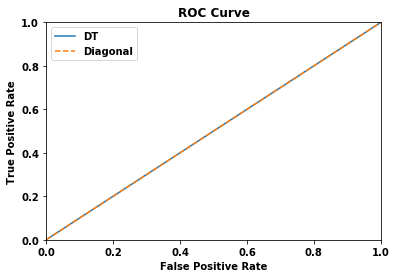

In [28]:
y_pred_prob = grid_search.predict_proba(X_test)
fpr_dt, tpr_dt, threshold = roc_curve(y_test, y_pred_prob[:,1])
fig, ax = plt.subplots()
ax.plot(fpr_dt, tpr_dt,label='DT')
ax.plot([0,1],[0,1], ls='--',label='Diagonal')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

2. LogisticRegression 模型调参与分析

In [29]:
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr', 'multinomial']
param_grid = dict(solver = solver_options, multi_class = multi_class_options)
grid_search = GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=10,n_jobs=-1, scoring='accuracy')
grid_result=grid_search.fit(X_train,y_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

Best: 0.981875 using {'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.980625  with:   {'multi_class': 'ovr', 'solver': 'newton-cg'}
0.980625  with:   {'multi_class': 'ovr', 'solver': 'lbfgs'}
0.981250  with:   {'multi_class': 'ovr', 'solver': 'liblinear'}
0.980625  with:   {'multi_class': 'ovr', 'solver': 'sag'}
0.981875  with:   {'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.981875  with:   {'multi_class': 'multinomial', 'solver': 'lbfgs'}
nan  with:   {'multi_class': 'multinomial', 'solver': 'liblinear'}
0.981875  with:   {'multi_class': 'multinomial', 'solver': 'sag'}


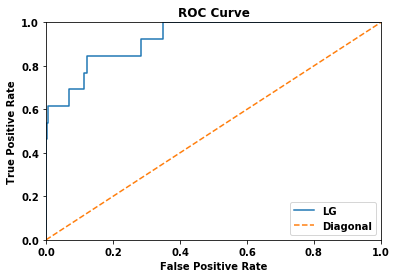

In [30]:
y_pred_prob = grid_search.predict_proba(X_test)
fpr_lg, tpr_lg, threshold = roc_curve(y_test, y_pred_prob[:,1])
fig, ax = plt.subplots()
ax.plot(fpr_lg, tpr_lg,label='LG')
ax.plot([0,1],[0,1], ls='--',label='Diagonal')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

3. SVM 模型调参与分析

In [31]:
svm_params = [{'kernel':['rbf'], 'gamma':[1e-2,1e-3],'C':[1,10,100,1000]}]
grid_search = GridSearchCV(SVC(), param_grid=svm_params, scoring='accuracy', cv=10,n_jobs=-1)
grid_result=grid_search.fit(X_train,y_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

Best: 0.983125 using {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.970000  with:   {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.970000  with:   {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.978750  with:   {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.970000  with:   {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.983125  with:   {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.979375  with:   {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.973125  with:   {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.981875  with:   {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


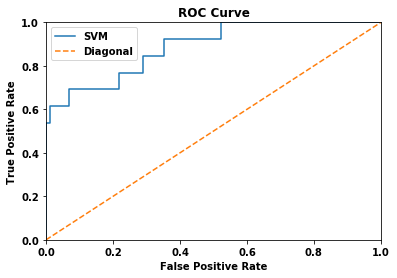

In [32]:
y_pred_prob = grid_search.decision_function(X_test)
fpr_svm, tpr_svm, threshold = roc_curve(y_test, y_pred_prob)
fig, ax = plt.subplots()
ax.plot(fpr_svm, tpr_svm,label='SVM')
ax.plot([0,1],[0,1], ls='--',label='Diagonal')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

4. Random Forest 模型调参与分析

In [33]:
n_estimators = [10,100,500]
max_depth = [10,30,50]
param_grid = dict(n_estimators=n_estimators , max_depth=max_depth)
grid_search = GridSearchCV(RandomForestClassifier(), param_grid,  scoring='roc_auc', cv=10,n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

Best: 0.845446 using {'max_depth': 10, 'n_estimators': 100}
0.843647  with:   {'max_depth': 10, 'n_estimators': 10}
0.845446  with:   {'max_depth': 10, 'n_estimators': 100}
0.813366  with:   {'max_depth': 10, 'n_estimators': 500}
0.792415  with:   {'max_depth': 30, 'n_estimators': 10}
0.827248  with:   {'max_depth': 30, 'n_estimators': 100}
0.831106  with:   {'max_depth': 30, 'n_estimators': 500}
0.783645  with:   {'max_depth': 50, 'n_estimators': 10}
0.832573  with:   {'max_depth': 50, 'n_estimators': 100}
0.821623  with:   {'max_depth': 50, 'n_estimators': 500}


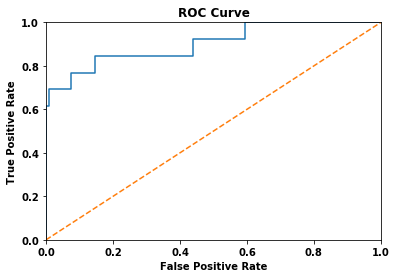

In [34]:
y_pred_prob = grid_search.predict_proba(X_test)
fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_pred_prob[:,1])
fig, ax = plt.subplots()
ax.plot(fpr_rf, tpr_rf,label='RF')
ax.plot([0,1],[0,1], ls='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

5. GBDT 模型调参与分析

In [35]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.2]
    }

grid_search = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

Best: 0.974375 using {'learning_rate': 0.01, 'loss': 'deviance'}
0.974375  with:   {'learning_rate': 0.01, 'loss': 'deviance'}
0.967500  with:   {'learning_rate': 0.2, 'loss': 'deviance'}


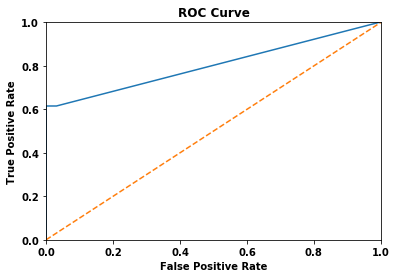

In [36]:
y_pred_prob = grid_search.predict_proba(X_test)
fpr_GBDT, tpr_GBDT, threshold = roc_curve(y_test, y_pred_prob[:,1])
fig, ax = plt.subplots()
ax.plot(fpr_GBDT, tpr_GBDT,label='GBDT')
ax.plot([0,1],[0,1], ls='--',label='Diagonal')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

6. XGBoost 模型调参与分析

In [37]:
parameters = {'n_estimators': np.linspace(100, 1000, 10, dtype=int)}
grid_search = GridSearchCV(XGBClassifier(), parameters, n_jobs=-1, cv=10,
                   scoring='accuracy' )
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

Best: 0.981250 using {'n_estimators': 100}
0.981250  with:   {'n_estimators': 100}
0.980625  with:   {'n_estimators': 200}
0.980625  with:   {'n_estimators': 300}
0.980625  with:   {'n_estimators': 400}
0.980625  with:   {'n_estimators': 500}
0.980625  with:   {'n_estimators': 600}
0.980625  with:   {'n_estimators': 700}
0.980625  with:   {'n_estimators': 800}
0.980625  with:   {'n_estimators': 900}
0.980625  with:   {'n_estimators': 1000}


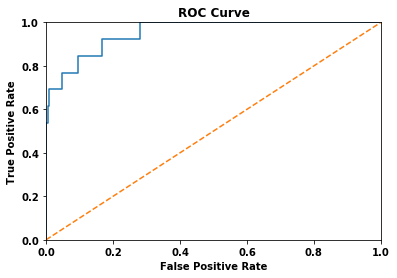

In [38]:
y_pred_prob = grid_search.predict_proba(X_test)
fpr_XGBoost, tpr_XGBoost, threshold = roc_curve(y_test, y_pred_prob[:,1])
fig, ax = plt.subplots()
ax.plot(fpr_XGBoost, tpr_XGBoost,label='XGBoost')
ax.plot([0,1],[0,1], ls='--',label='Diagonal')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### 模型比较

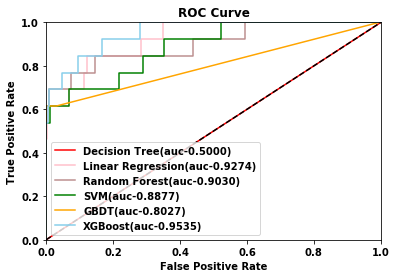

In [43]:
from sklearn.metrics import auc
fig, ax = plt.subplots()
ax.plot(fpr_dt, tpr_dt, color='red', label='Decision Tree(auc-{:.4f})'.format(auc(fpr_dt, tpr_dt)))
ax.plot(fpr_lg, tpr_lg, color='pink', label='Linear Regression(auc-{:.4f})'.format(auc(fpr_lg, tpr_lg)))
ax.plot(fpr_rf, tpr_rf, color='rosybrown', label='Random Forest(auc-{:.4f})'.format(auc(fpr_rf, tpr_rf)))
ax.plot(fpr_svm, tpr_svm, color='green', label='SVM(auc-{:.4f})'.format(auc(fpr_svm, tpr_svm)))
ax.plot(fpr_GBDT, tpr_GBDT, color='orange', label='GBDT(auc-{:.4f})'.format(auc(fpr_GBDT, tpr_GBDT)))
ax.plot(fpr_XGBoost, tpr_XGBoost, color='skyblue', label='XGBoost(auc-{:.4f})'.format(auc(fpr_XGBoost, tpr_XGBoost)))
ax.plot([0,1],[0,1], ls='--', color='black')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

总结：当对6个模型进行调参获取最优模型后，采用ROC曲线时，模型曲线下覆盖的面积从大到小（预测效果）排序：

1. XGboost
2. Linear Regression
3. Random Forest
4. SVM
5. GBDT
6. Decision Tree